## Homework3: Machine Learning 

Implement the following tasks: 
- Treat lpsa as the outcome, and use all other variables in the data set as predictors.
- With the training subset of the prostate data, train a least-squares regression model with all predictors.
- Use the testing subset to compute the test error (average squared-error loss) using the fitted least-squares regression model.
- Train a ridge regression model (see glmnet in R or sklearn.linear_model and its alpha argument in Python) and tune the value of lambda, i.e., for a sequence of lambda find the value of lambda that approximately minimizes the test error.
- Create a figure that shows the training and test error associated with ridge regression as a function of lambda.
- Create a path diagram of the ridge regression analysis, similar to HTF Figure 3.8 

## Load Libraries and Data  

In [1]:
import pandas as pd 
import numpy as np 
import os 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


current_wd = os.getcwd()

# Load the prostate cancer data
data_path = f'{current_wd}/prostate.csv'
prostate_data = pd.read_csv(data_path)

# Display the first few rows of the dataframe to understand its structure
prostate_data.head()


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,True
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,True
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,True
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,True
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,True


### Split the data into train and test 
I will treat lpsa as an outcome, the remaining would be predictors. 

In [2]:
# Separate predictors and outcome
X = prostate_data.drop(['lpsa', 'train'], axis=1)
y = prostate_data['lpsa']

# Split data into training and testing sets based on the 'train' column
X_train = X[prostate_data['train']]
y_train = y[prostate_data['train']]
X_test = X[~prostate_data['train']]
y_test = y[~prostate_data['train']]

### Train a least-squares regression model with all predictors

In [3]:
# Call a least-square regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Compute the test error (average squared-error loss)

In [4]:
# Predict on the test set
y_pred_test = lr_model.predict(X_test)

# Compute average squared-error loss: 
test_error_lr = mean_squared_error(y_test, y_pred_test)

print(f'Test error: {test_error_lr:.4f}')

Test error: 0.5213


### Train a ridge regression model; find alpha that minimizes the test error

In [5]:
# Define a range of lamba values
lambdas = np.logspace(-6, 6, 200)

# Train ridge regression models to find the best lambda 
train_errors = []
test_errors = []
coeffs = []
for val in lambdas:
    ridge_model = Ridge(alpha=val)
    ridge_model.fit(X_train, y_train)
    
    # Training error
    y_pred_train = ridge_model.predict(X_train)
    train_errors.append(mean_squared_error(y_train, y_pred_train))

    # Test error
    y_pred_test = ridge_model.predict(X_test)
    test_errors.append(mean_squared_error(y_test, y_pred_test))

    # Coefficients
    coeffs.append(ridge_model.coef_)

# Find the index of the minimum test error
min_test_error_index = np.argmin(test_errors)

# Use this index to find the optimal lambda value
optimal_lambda = lambdas[min_test_error_index]

# Print the optimal lambda and its corresponding test error
print("Optimal lambda:", optimal_lambda)
print("Minimum test error:", test_errors[min_test_error_index])

Optimal lambda: 0.352970730273065
Minimum test error: 0.5211839100798579


### Plot training and test error associated with ridge regression as a function of lambda

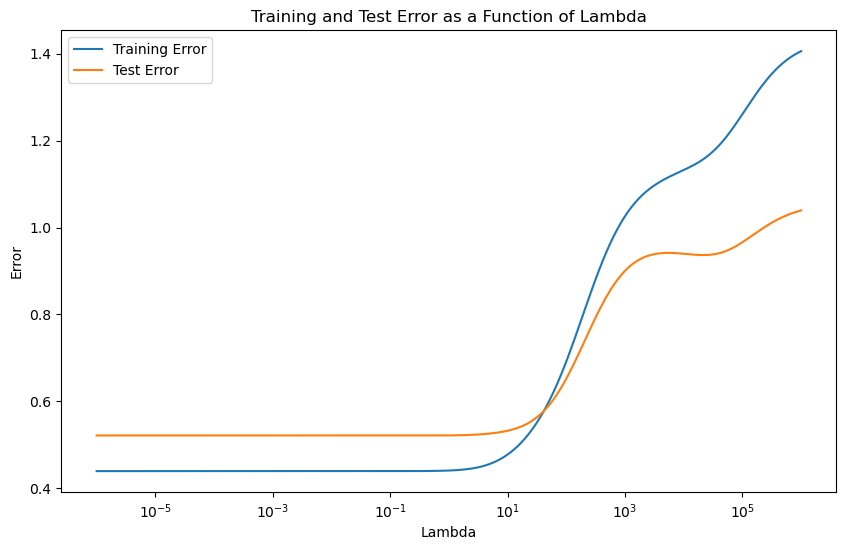

In [6]:
# Plot the training and test errors as a function of lambda
plt.figure(figsize=(10, 6))
plt.plot(lambdas, train_errors, label='Training Error')
plt.plot(lambdas, test_errors, label='Test Error')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.title('Training and Test Error as a Function of Lambda')
plt.legend()
plt.show()

# Create a path diagram of the ridge regression analysis
I will plot coefficient with degrees of freedom. In ridge regression, the degrees of freedom is approximated as the trace of the hat matrix. In this problem, I will do the following steps: 

- 1) Calculate the hat matrix for each lambda. The hat matrix is as follow: $$H(\lambda) = X(X^{T}X+\lambda I)^{-1}X^T$$
- 2) Calculate the trace of hat matrix to approximate degree of freedoms 
- 3) Plot the coefficients against the degrees of freedom 

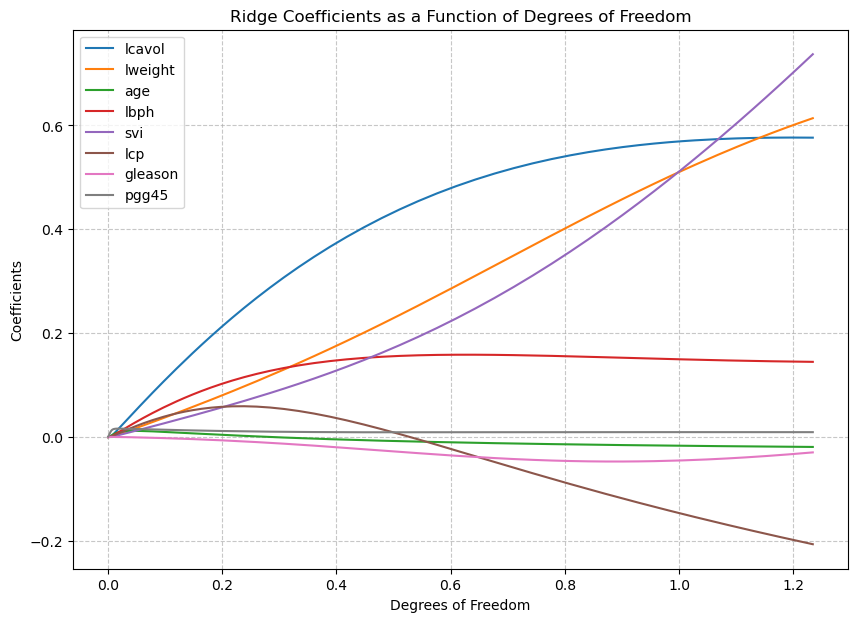

In [7]:
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
d = S / (S**2 + lambdas[:, np.newaxis])
dfs = d.sum(axis=1) # Degrees of freedom

# Convert coefficients list to a NumPy array for easier plotting
coeffs = np.array(coeffs)

# Plotting the path of each coefficient against degrees of freedom

plt.figure(figsize=(10, 7))
for i in range(coeffs.shape[1]):
    plt.plot(dfs, coeffs[:, i], label=X.columns[i])

plt.xlabel('Degrees of Freedom')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a Function of Degrees of Freedom')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()